#### <center> Quikr Cars Analysis </center>

##### Table of Contents
1. [About the Dataset](#sec1)
2. [Importing the Dataset](#sec2)
3. [Data Pre-Processing](#sec3)
4. [Data Visualization](#sec4)
5. [Data Modelling](#sec5)

<a id="sec1"></a>
#####  About the dataset 
QuikrCars helps you find, sell and buy used cars, new cars, bikes and scooters, commercial vehicles, bicycles and even spare parts and accessories. 

[Quikr-cars](https://www.kaggle.com/datasets/raihansoniwala/quikr-cars) (taken from Kaggle)

This dataset contains data of Quikr Cars about second hand cars . This data was web scrapped from their website and have data of about 1000 cars and have features like: Name, Company, Quikr Label (Platinum / Gold), Location, Price, Kms driven, Fuel type.

<a id='sec2'></a>
##### Importing the libraries 

In [109]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

##### Importing the files 

In [110]:
df = pd.read_csv('Quikr_car.csv')
data = pd.read_csv('Quikr_car.csv')

<a id='sec3'></a>
##### Data Pre-Processing

In [111]:
data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


There is an extra column 'Unnamed: 0' which can be removed. 

In [112]:
data = data.drop(['Unnamed: 0'], axis=1)

In [113]:
data.shape

(1032, 9)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1032 non-null   object
 1   Label       1032 non-null   object
 2   Location    1030 non-null   object
 3   Price       1032 non-null   object
 4   Kms_driven  1032 non-null   object
 5   Fuel_type   1032 non-null   object
 6   Owner       740 non-null    object
 7   Year        1032 non-null   int64 
 8   Company     1032 non-null   object
dtypes: int64(1), object(8)
memory usage: 72.7+ KB


Only the year column in the dataset is of the int object type.

In [115]:
data.describe()

,Year
count,1032.000000
mean,2015.810078
std,3.396920
min,2000.000000
25%,2014.000000
50%,2016.000000
75%,2018.000000
max,2022.000000


In [116]:
data.isnull().sum()

Name            0
Label           0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         292
Year            0
Company         0
dtype: int64

'Location' and 'Owner' have 2 and 292 missing values respectively.

In [117]:
data[data['Location'].isnull()]

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
283,Maruti Suzuki Maruti 800 Std BSII - 2005,GOLD,NaN,"₹65,000","1,08,252 kms",Petrol,NaN,2005,Maruti
887,Honda City ZX CVT Petrol - 2018,GOLD,NaN,"₹10,69,999","54,000 kms",CNG,1st Owner,2018,Honda


In [118]:
data['Price'].min() , data['Price'].max()

('Ask For Price', '₹97,000')

##### Columns that need to edited:
1. Price <br>
       > object type should be numeric <br>
       > commas and rupees symbol should be removed <br>
       > 'ask for price' should be removed <br>
2. Kms_driven <br>
       > object type should be numeric <br>
       > commas should be removed <br>
       > kms string should be removed <br>
3. Fuel_type <br>
       > duplicate values like ' Petrol', ' Petrol ',' Diesel ', ' Diesel',' Electric ', ' CNG', ' LPG', ' Petrol + CNG ', ' Hybrid ', ' CNG ' should be revised <br>
4. Owner <br>
       > has null values
5. Location <br>
       > has 2 missing values
6. Name <br>
       > too long/complicated to differentiate

For the Price Column:

In [119]:
data = data.drop(data[data['Price'] == 'Ask For Price'].index)

In [120]:
data['Price'] = data['Price'].str.replace(',' , '')
data['Price'] = data['Price'].str[1:].astype(int)

For the Kms_driven column:

In [121]:
data['Kms_driven'] = data['Kms_driven'].str.replace(',','').str.replace('kms','')
data['Kms_driven'] = data['Kms_driven'].astype(int)

For the Fuel_type column:

In [122]:
data['Fuel_type'] = data['Fuel_type'].str.replace(' ', '')

For the Owners column:

In [123]:
data = data.drop('Owner', axis = 1)

For the Location column:

In [124]:
data = data.drop(data[data['Location'].isnull()].index)

For the Name column:

In [125]:
data['Name'] = data['Name'].str.split(' ').str.slice(0,3).str.join(' ')

In [126]:
data.describe(include='all')

,Name,Label,Location,Price,Kms_driven,Fuel_type,Year,Company
count,1024,1024,1024,1.024000e+03,1024.000000,1024,1024.000000,1024
unique,229,2,39,NaN,NaN,7,NaN,25
top,Maruti Suzuki Alto,PLATINUM,Pune,NaN,NaN,Petrol,NaN,Maruti
freq,78,687,323,NaN,NaN,723,NaN,382
mean,NaN,NaN,NaN,6.859439e+05,50239.334961,NaN,2015.818359,NaN
std,NaN,NaN,NaN,5.375162e+05,38137.141129,NaN,3.389105,NaN
min,NaN,NaN,NaN,3.900000e+04,0.000000,NaN,2000.000000,NaN
25%,NaN,NaN,NaN,4.110990e+05,26207.000000,NaN,2014.000000,NaN
50%,NaN,NaN,NaN,5.576990e+05,44000.000000,NaN,2016.000000,NaN
75%,NaN,NaN,NaN,7.877990e+05,67499.000000,NaN,2018.000000,NaN


In [127]:
data = data[data['Price']<6000000]

In [128]:
data = data.reset_index(drop=True)

In [129]:
data.to_csv('Clean_car_data.csv')

Descriptive Statistics

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1023 non-null   object
 1   Label       1023 non-null   object
 2   Location    1023 non-null   object
 3   Price       1023 non-null   int32 
 4   Kms_driven  1023 non-null   int32 
 5   Fuel_type   1023 non-null   object
 6   Year        1023 non-null   int64 
 7   Company     1023 non-null   object
dtypes: int32(2), int64(1), object(5)
memory usage: 56.1+ KB


In [131]:
data.describe()

,Price,Kms_driven,Year
count,1.023000e+03,1023.000000,1023.000000
mean,6.792831e+05,50254.231672,2015.815249
std,4.936902e+05,38152.813866,3.389301
min,3.900000e+04,0.000000,2000.000000
25%,4.107990e+05,26188.000000,2014.000000
50%,5.575990e+05,44000.000000,2016.000000
75%,7.870990e+05,67525.000000,2018.000000
max,4.490000e+06,690000.000000,2022.000000


In [133]:
data['Price'].median()

557599.0

In [134]:
data['Price'].mode()

0    69000
Name: Price, dtype: int32

<a id='sec4'></a>
##### Data Visualization

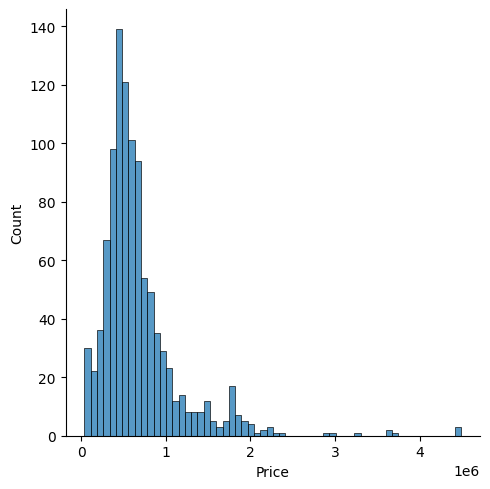

In [137]:
sns.displot(data['Price'])

C:\Users\gyanada\AppData\Local\Temp\ipykernel_16540\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

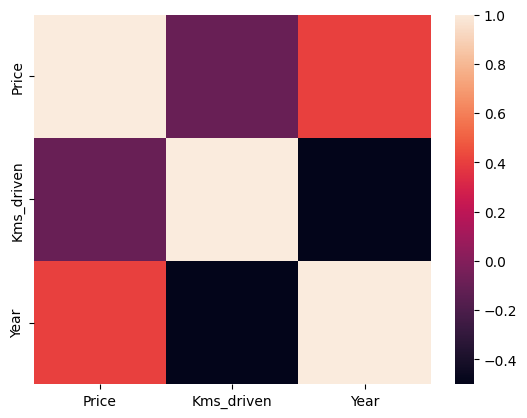

In [138]:
sns.heatmap(data.corr())

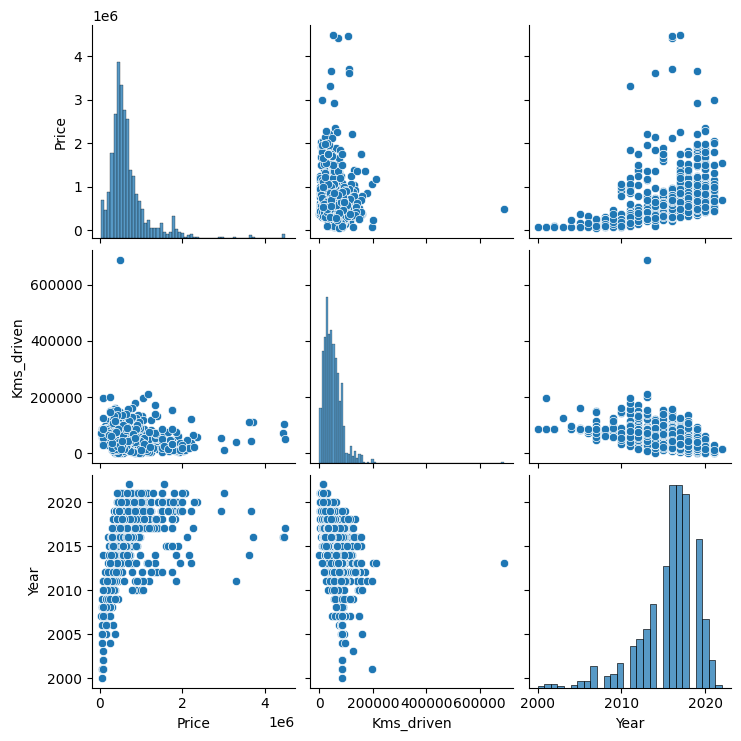

In [139]:
sns.pairplot(data)

Text(0.5, 1.0, 'Count of Cars per Label')

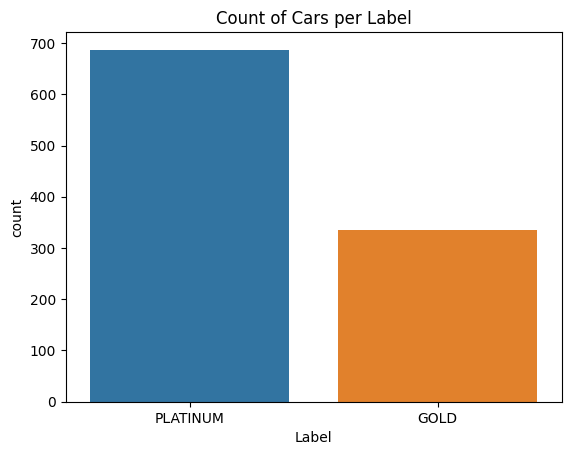

In [140]:
sns.countplot(data, x=data['Label'])
plt.title('Count of Cars per Label')

Text(0.5, 1.0, 'Count of Cars by Company')

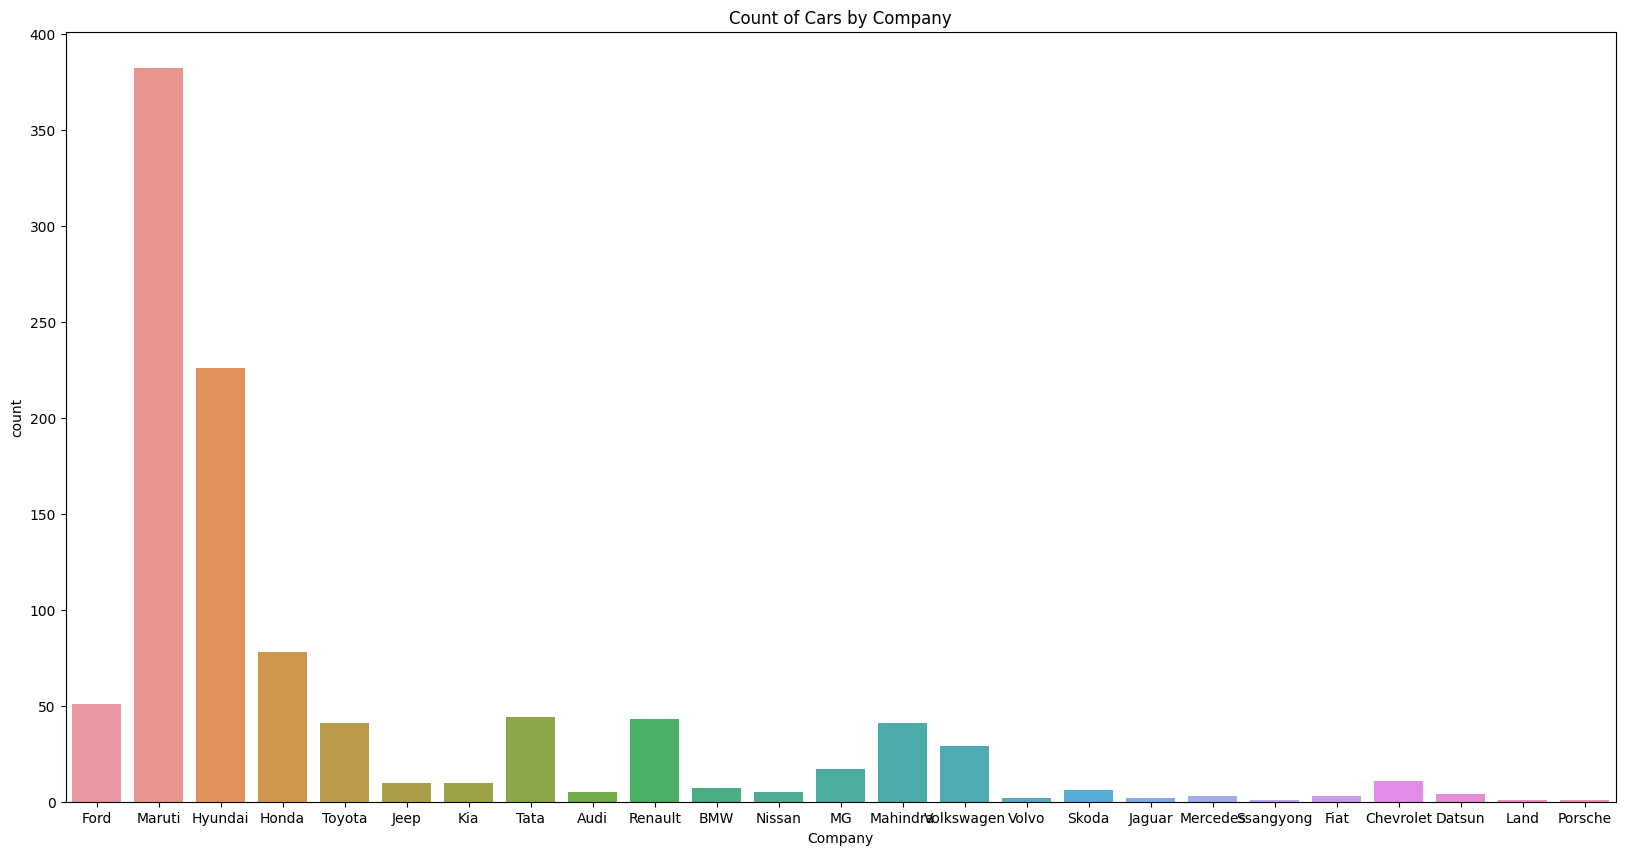

In [141]:
plt.figure(figsize=(20,10))
sns.countplot(data, x=data['Company'])
plt.title('Count of Cars by Company')

Text(0.5, 1.0, 'Count of Cars by Fuel Type')

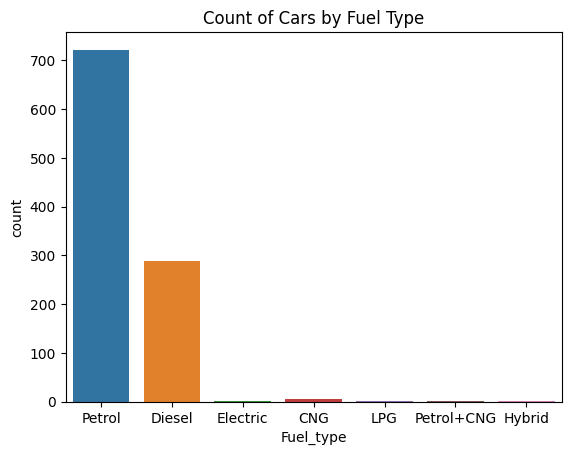

In [143]:
sns.countplot(data, x=data['Fuel_type'])
plt.title('Count of Cars by Fuel Type')

<a id='sec5'></a>
##### Data Modelling

In [144]:
x = data.drop(columns='Price')
y = data['Price']

We use OneHotEncoder for the columns with nominal values as these are categorical variables and hence can't be interpreted as is.

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=np.argmax(score))

In [146]:
ohe = OneHotEncoder()
ohe.fit(x[['Name','Location','Fuel_type','Company']])

OneHotEncoder()

In [147]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','Location','Fuel_type','Company']),
                                       (OrdinalEncoder(categories=[['PLATINUM', 'GOLD']]), ['Label']),
                                       (StandardScaler(), ['Kms_driven']),
                                       remainder='passthrough')

Linear Regression

In [148]:
lr = LinearRegression()

In [149]:
pipe = make_pipeline(column_trans, lr)

In [150]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi Q3 -', 'Audi Q5 2.0', 'Audi Q7 3.0', 'Audi Q7 35',
       'BMW 3 Series', 'BMW 5 Series', 'BMW X5 xDrive30d',
       'Chevrolet Aveo -', 'Chevrolet Beat -', 'Chevrolet Beat LS',
       'Chevrolet Beat LT', 'Chevrolet Cruze LTZ', 'Chevrolet Optra -',
       'Chevrolet S...
       'Hyundai', 'Jaguar', 'Jeep', 'Kia', 'Land', 'MG', 'Mahindra',
       'Maruti', 'Mercedes', 'Nissan', 'Porsche', 'Renault', 'Skoda',
       'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)]),
                                                  ['Name', 'Location',
                                                   'Fuel_type', 'Company']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['PLATINUM',
                                                                              'GOLD']]),
                                                  ['Label']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['Kms_driven'])])),
                ('linearregression', LinearRegression())])

In [151]:
y_pred = pipe.predict(x_test)

Checking the metrics for this model:

In [152]:
r2_score(y_test, y_pred)

0.8601946841285737

In [153]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [154]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 101447.04382934113
Mean Squared Error (MSE): 25810311528.75687
Root Mean Squared Error (RMSE): 160655.87922250736
R-squared (R²): 0.8601946841285737


How to check for best result:

In [155]:
score = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=i)  
    lr = LinearRegression()    
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    score.append(r2_score(y_test, y_pred))

In [156]:
np.argmax(score)

332

In [157]:
score[np.argmax(score)]

0.8601946841285737